In [12]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cf
import pandas as pd
import xarray as xr

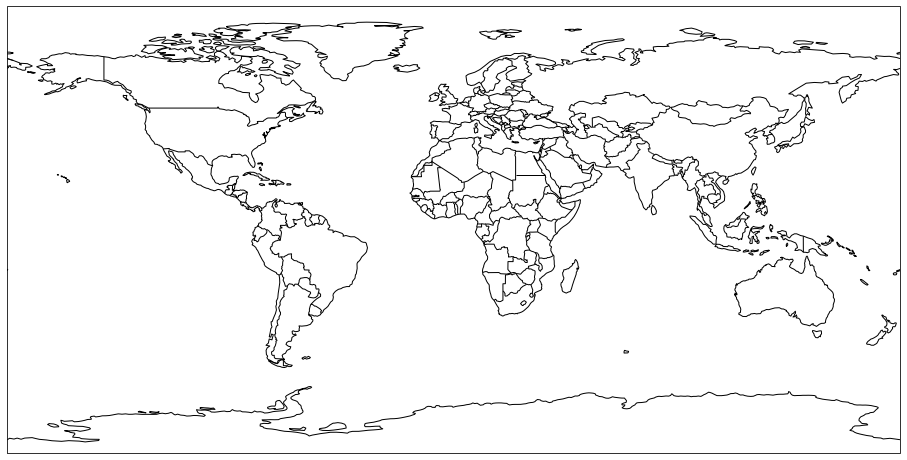

In [13]:
fig = plt.figure(1, figsize=(16,9))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

In [17]:
lats = list(np.round(np.arange(33.05, 72.05, 0.1),4))
lons = list(np.round(np.arange(-14.9, 35.1, 0.2),4))

#ims = []

filepath = '/gpfs/scratch1/shared/dkivits/STILT/footprints/footprint_CBW_2021x07x05x12x51.97Nx004.93Ex00207.nc'
footname = filepath.split('/')[-1]

foot = nc.Dataset(filepath)
print(foot['Influence'])

# Get start time of footprint
timestr = filepath[-37:-24]
fp_starttime = pd.to_datetime(timestr, format="%Yx%mx%dx%H")
fp_endtime = fp_starttime - pd.Timedelta(hours=foot['Time'].shape[0])

# Extract latitude indices from sparse footprint file using list comprehension
lat_indices = [lats.index(i) for i in list(np.round(foot.variables['Latitude'][:].tolist(), 4))]
lon_indices = [lons.index(i) for i in list(np.round(foot.variables['Longitude'][:].tolist(), 4))]

array = np.zeros((len(lats), len(lons)))
timelist = np.unique(foot['Time'])

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are animating three artists, one from each
# subplot

for i in range(0,len(timelist)):
    ax.set_title('STILT ' + str(footname[0:-3]), size = 8)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_xlim(-15,35)
    ax.set_ylim(33,72)

    foot_array = foot['Influence'][foot['Time'] == timelist[i]]
    array[lat_indices, lon_indices] = foot_array
    foot_array = foot['Influence'][i, lon_indices[i], lat_indices[i]]
    im = ax.imshow(foot_array, cmap='Reds', extent=[-15,35,33,72])
    plt.colorbar(ax = ax, mappable = im, orientation = 'vertical', pad = 0.05)
    
    plt.savefig(footname[0:-3] + '_' + str(i) + '.png', dpi = 300)

    #ims.append([im])

#ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
#                                repeat_delay=1000)

#writervideo = animation.PillowWriter(fps=30) 
#ani.save(footname[0:-3] + '.gif', writer=writervideo)

<class 'netCDF4._netCDF4.Variable'>
float32 Influence(Nonzero_len)
    units: ppm ug ms^-2 s^-1)
    long_name: Simulated influence
unlimited dimensions: Nonzero_len
current shape = (26001,)
filling on, default _FillValue of 9.969209968386869e+36 used


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (26001,)